In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [2]:
! git clone https://github.com/ShawnLiu119/Telco-Customer-Churn-Prediction.git

Cloning into 'Telco-Customer-Churn-Prediction'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [3]:
!cd /content/Telco-Customer-Churn-Prediction

### pd.read_csv(parse_dates = ) to deal with datetime

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [5]:
data_path = '/content/Telco-Customer-Churn-Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###EDA

In [6]:
df.info()

#total charge should be numeric, rather than charge
#no missing values or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#####separate numeric and categprical columns/

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN.

In [8]:
df.isnull().sum() ##finding all missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

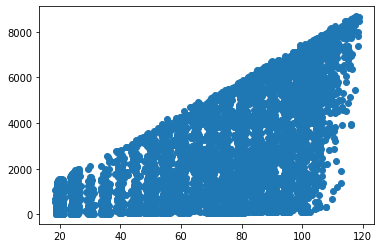

In [9]:
#since there are only 11 missing values in Total charge, we can either remove them or inpute with median??

plt.scatter(df['MonthlyCharges'], df['TotalCharges'] )
#we can tell there is no strong correlation between monthlycharge and total charge, the varance even increases

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#explore categorical and numeric feature separately

col = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(col) - set(num_cols))

print(cat_cols, num_cols)

['StreamingMovies', 'customerID', 'PaymentMethod', 'gender', 'DeviceProtection', 'Partner', 'Dependents', 'OnlineBackup', 'InternetService', 'StreamingTV', 'MultipleLines', 'Contract', 'PaperlessBilling', 'OnlineSecurity', 'Churn', 'PhoneService', 'TechSupport'] Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [12]:
##another way to do this is df.select_dtypes

num_df = df.select_dtypes(include = ['number']) # select all numerical, include 'int64', 'float64',
cat_df = df.select_dtypes(include = ['object', 'bool']) # cat_df = df.select_dtypes(include = ['category']) does not work, return empty


In [13]:
#Features in class

# 1. demogrpahic: gender,  seniroCitizen, partner, dependents
# 2. Customer account and activity: rest 

In [14]:
#customer_id contains little info, considered not relevant to the prediction

df = df.drop(columns=['customerID'], axis=1)

In [15]:
# To add label value on the bar chart, need to self define a function
def addlabels(x,y): 
    for i in range(len(x)):
        plt.text(i, y[i], y[i])  #first two are coordinate position, third one is value; if it is categorical variable, then you can not use x[i] as x-axis since it is textual values

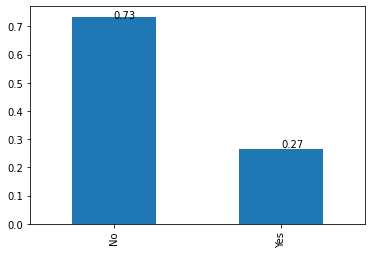

In [16]:
#explore the target variable

# df['Churn'].value_counts().plot(kind='bar') 
df['Churn'].value_counts(normalize=True).plot(kind='bar')
addlabels(df['Churn'].value_counts(normalize=True).index.values.tolist(), df['Churn'].value_counts(normalize=True).round(2).values)
#normalize shows %

EDA General Practice

- y vs x: heatmap of correlation, scatter, stack/distribution of y per individual x variable

- y alone: bar chart (normalize) to detect whether the data is imbalanced or not

- x-numeric variables: histogram, distribution, description of stats

- x-categorical variables: stack/h/ bar chart

In [17]:
# numeric variable visualization
df.describe()  #quick overlook the stats of numeric variables

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


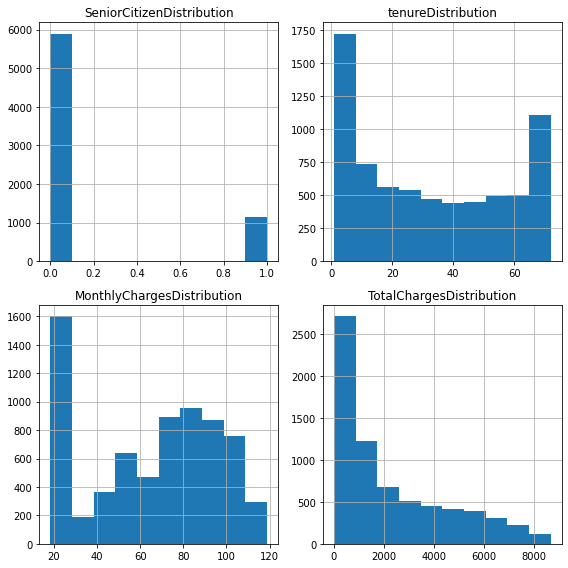

In [18]:
#histogram for all numeric variables

def draw_histogram(df, num_var, n_rows, n_cols):
    fig = plt.figure(figsize=(8,8))
    for i, var in enumerate(num_var):
        ax = fig.add_subplot(n_rows, n_cols, i+1)    #the order of subplot starts with 1
        df[var].hist(bins=10, ax=ax)  #ax --> the ax to plot the chart on
        ax.set_title(var + 'Distribution')
    fig.tight_layout()
    plt.show()

df_num = df.select_dtypes(include='number')
num_col = df.select_dtypes(include='number').columns

draw_histogram(df_num,num_col, 2,2)

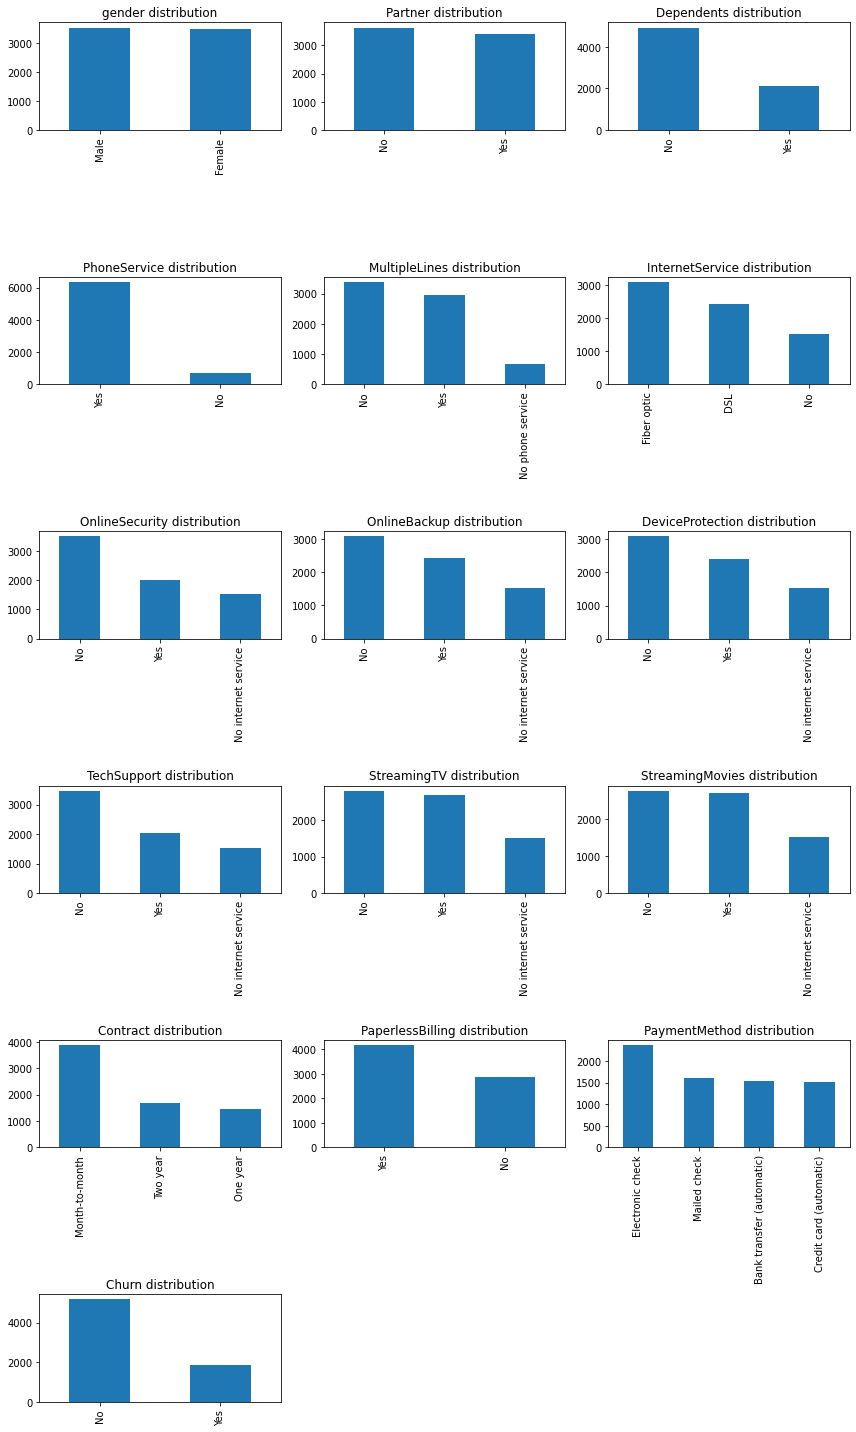

In [19]:
#catogrical features

def draw_bar(df, cat_var, n_rows, n_cols):
    fig = plt.figure(figsize=(12,20))
    for i, var in enumerate(cat_var):
        ax = fig.add_subplot(n_rows, n_cols, i+1)    #the order of subplot starts with 1
        df[var].value_counts().plot(kind='bar') #ax --> the ax to plot the chart on
        ax.set_title(var + ' distribution')
    fig.tight_layout()
    plt.show()


df_cat = df.select_dtypes(exclude='number')
cat_col = df_cat.columns

draw_bar(df_cat,cat_col, 6,3)

In [76]:
# encode categorical variable to numbers

#for a cateogrical variable with n unique values, one-hot encoder can create n-1 columns by "drop=first"
#https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db

from sklearn.preprocessing import OneHotEncoder


def oh_trans(df):
    ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)
    #"drop=first", drop the first category to avoid multicolinearity
    #"sparse=false" return an array instead of sparse column
    df_cat = df.select_dtypes(exclude='number')
    df_num = df.select_dtypes(include='number')

    df_cat_oh = pd.DataFrame(ohe.fit_transform(df_cat)) #tranformed result is an object
    cat_oh = ohe.get_feature_names_out() #get_feature_names_out() will return tranformed one hot column name
    df_cat_oh.columns = cat_oh
    
    ##beause 11 rows were removed from the original column, the index need to be reset, otherwise the onehotencoded df will have different index
    df_num.reset_index(inplace=True, drop=True)
    df_new = pd.concat([df_num, df_cat_oh], axis=1)

    return df_new

df_1 = oh_trans(df)


In [ ]:
# ohe= OneHotEncoder(categories='auto', drop='first', sparse=False)
#     #"drop=first", drop the first category to avoid multicolinearity
#     #"sparse=false" return an array instead of sparse column
# df_cat = df.select_dtypes(exclude='number')
# df_num = df.select_dtypes(include='number')

# df_cat_oh = pd.DataFrame(ohe.fit_transform(df_cat)) #tranformed result is an object
# cat_oh = ohe.get_feature_names_out() #get_feature_names_out() will return tranformed one hot column name
# df_cat_oh.columns = cat_oh

# print(len(df_cat_oh.index.values)) 
# print(len(df_cat.index.values))
# print(len(df_num.index.values))

# df_num[df_num.index.values != df_cat.index.values]
# df_num[df_cat.index.values != df_cat_oh.index.values]

# df_num.reset_index(inplace=True, drop=True)
# df_num[df_num.index.values != df_cat_oh.index.values]


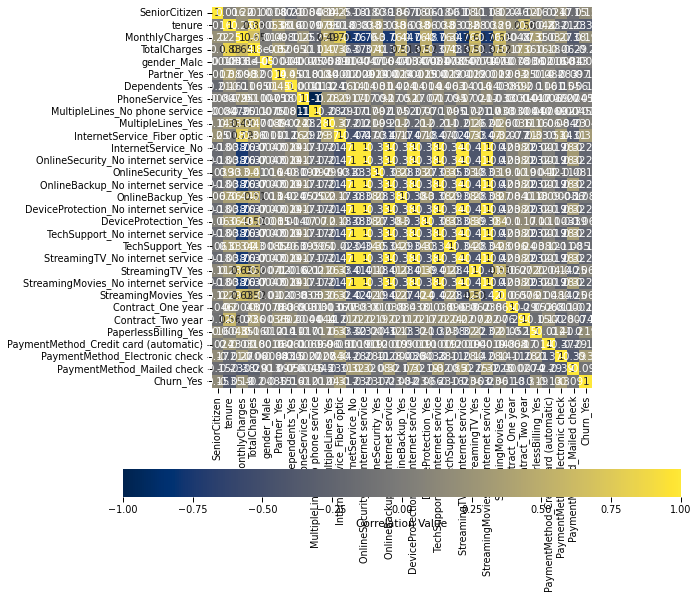

In [77]:
# y vs x relationship

def draw_corr(df):
    cor_df = df.corr()
    plt.subplots(figsize=(10,10))
    sns.heatmap(cor_df, 
                cmap = "cividis",
                annot = True, 
                square = True, 
                cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'})
    
draw_corr(df_1)

In [78]:
##from the correlation heatmap, we can tell there are bunch of intercorrelation between certain features, we need to do some feature engineer
#since multiple features with "no internet service" show colinearity, I will remove them or categorize them, just leave one 

df_2 = df_1.drop(['OnlineSecurity_No internet service',
                  'OnlineBackup_No internet service', 
                  'DeviceProtection_No internet service',
                  'TechSupport_No internet service',
                  'StreamingTV_No internet service',
                  'StreamingMovies_No internet service',
                  'PhoneService_Yes'], axis=1)

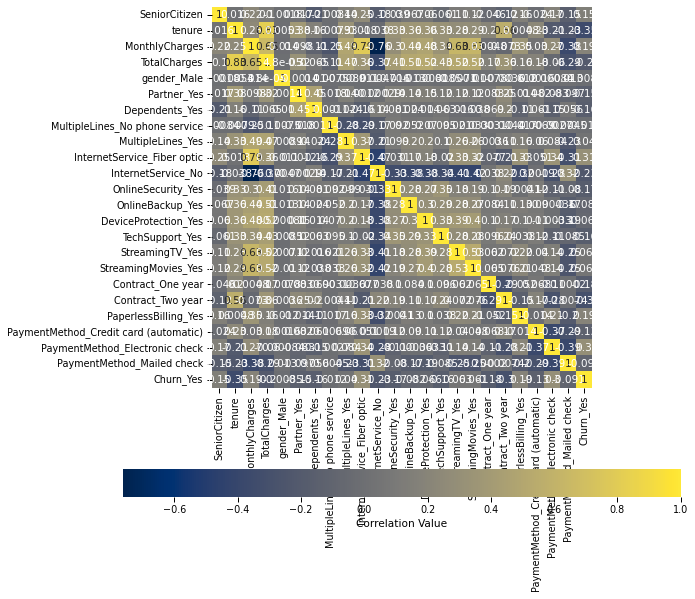

In [79]:
draw_corr(df_2)

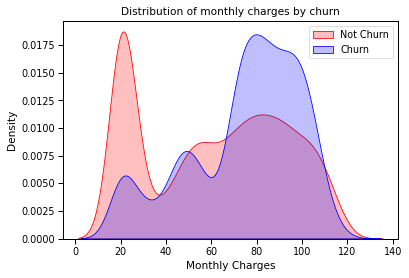

In [80]:
### distribution --> target vs individual variable
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

#price seems to matter that, high monthly charge lead people to leave

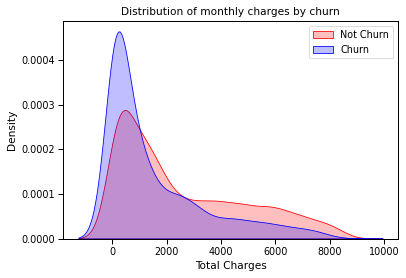

In [81]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of monthly charges by churn');

Some insight should be taken out from the EDA:
- remove feature that does not contribute (y distribution vs individual variable)
- detect multicolinearity or good predictor

Gender : There is not much difference between gender on the churn rate. We won't include gender into our model.

Partner : Customer without any relationship, single customer almost 1.7 times more likely churn than cutomer with a partner.

Dependents : Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.

Phone Service: Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small. We won't include phone service into our model.

Multiple Lines : Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.
ìnternet Service : Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.

Online Security: A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.

Online Backup A customer with an online backup service with the company almost 1.35 times less likely to leave the company than a customer without any online backup service with the company.

Device Protection : A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.

Tech Support : A customer with a Tech Support service with the company almost 2.06 times less likely to leave the company than a customer without any a Tech Support service with the company.

Streaming TV Service : A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.

Streaming Movies Service : A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.

Contract Type : Great differences based on the contract were seen in the histogram and mean differences.

Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.

On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.

Paperless Billing : A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.

Payment Method : Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.


###Data Preprocessing (split, normalize)

In [82]:
#train test split
from sklearn.model_selection import train_test_split

y = df_2['Churn_Yes']
x = df_2.drop(['Churn_Yes'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [83]:
from sklearn.preprocessing import MinMaxScaler

num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

minmax = MinMaxScaler()

x_train[num_col] = minmax.fit_transform(x_train[num_col])
x_test[num_col] = minmax.transform(x_test[num_col])     

In [84]:
#prepare another version of non-ecoded data for comparision purpose of decition tree

y_u = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
x_u = df.drop(['Churn', 'PhoneService'], axis = 1)


x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(x_u, y_u, test_size=0.2, random_state=40)

###Model Selection & Development

In [ ]:
pip install optuna

In [31]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [89]:
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

#---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [122]:
#### parameters of each model for randomsearch
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)] # maximum number of levels allowed in each decision tree
min_samples_split = [3, 4, 5, 6, 7, 8, 9, 10] # minimum sample number to split a node
min_samples_leaf = [1, 2, 3, 4] # minimum sample number that can be stored in a leaf node
max_features = ['sqrt', 'log2']
bootstrap = [True, False]
criterion = ['gini', 'entropy']
booster = ['gbtree', 'gblinear']
learning_rate = [0.01, 0.05, 0.1, 0.2]
gamma = [0,0.25,1]
reg_lambda = [0,1,10]
subsample = [0.5, 0.7, 0.9]

params = {
    'decisiontree': 
        {'min_samples_leaf': min_samples_leaf,
         'min_samples_split' :min_samples_split,
         'max_depth': max_depth
        },
    'RandomForest':
        {'criterion': criterion,
         'min_samples_leaf': min_samples_leaf,
         'min_samples_split' :min_samples_split,
         'n_estimators': n_estimators
        },
    'XGBoost':
        {'learning_rate_int': learning_rate ,
         'max_depth': max_depth,
         'n_estimators':  n_estimators,
         'booster': booster,
         'gamma': gamma,
         'reg_lambda' : reg_lambda,
         'subsample':subsample
        },
    'CatBoost':
        {'iterations': n_estimators,
         'learning_rate': learning_rate,
         'depth': max_depth,
         'l2_leaf_reg': reg_lambda,
         'min_data_in_leaf': min_samples_leaf,
         'rsm': subsample
        },
    'LightGBM':
        {'num_boost_round': n_estimators,
         'learning_rate': learning_rate,
         'max_depth': max_depth,
         'bagging_fraction' : subsample,
         'min_data_in_leaf' : min_samples_leaf,
         'lambda_l2': reg_lambda
        }
}



#####RandomSearch with cross validation

In [123]:
cv_score = {}

In [126]:
#base model to compare scaled data vs non-scaled data

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
cb = CatBoostClassifier()
lgb = LGBMClassifier()

In [127]:
## randomsearch for Decision Tree

CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(dt, params['decisiontree'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train, y_train)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score['decisiontree'] = clf.best_score_
    

best score is : 0.5874870741923635
best estimator is : DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=3)
best Params is : {'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5}


In [128]:
#Random Search for RandomForest
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(rf, params['RandomForest'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train, y_train)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score['RandomForest'] = clf.best_score_

best score is : 0.5876606205043261
best estimator is : RandomForestClassifier(min_samples_leaf=3, min_samples_split=6, n_estimators=23)
best Params is : {'n_estimators': 23, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'gini'}


In [129]:
#Random Search for XGBoost
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(xgb, params['XGBoost'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train, y_train)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score['XGBoost']= clf.best_score_

best score is : 0.5999295840443218
best estimator is : XGBClassifier(booster='gblinear', learning_rate_int=0.05, max_depth=7,
              n_estimators=177, reg_lambda=0, subsample=0.5)
best Params is : {'subsample': 0.5, 'reg_lambda': 0, 'n_estimators': 177, 'max_depth': 7, 'learning_rate_int': 0.05, 'gamma': 0, 'booster': 'gblinear'}


In [130]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(xgb, params['XGBoost'], scoring ='accuracy', cv = CV, n_jobs=-1)
clf.fit(x_train, y_train)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

best score is : 0.8062176444188796
best estimator is : XGBClassifier(gamma=0.25, learning_rate_int=0.05, max_depth=7, n_estimators=45,
              reg_lambda=10, subsample=0.9)
best Params is : {'subsample': 0.9, 'reg_lambda': 10, 'n_estimators': 45, 'max_depth': 7, 'learning_rate_int': 0.05, 'gamma': 0.25, 'booster': 'gbtree'}


In [131]:
### the F1 score is significantly lower than Accuracy, due to the data imbalance, maybe we should do a SMOTE or other over/undersampling technique to deal with this

In [132]:
#Random Search for CatBoost
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(cb, params['CatBoost'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train, y_train)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score['CatBoost'] = clf.best_score_

0:	learn: 0.5826887	total: 2.03ms	remaining: 178ms
1:	learn: 0.5288818	total: 3.83ms	remaining: 167ms
2:	learn: 0.4945936	total: 5.76ms	remaining: 165ms
3:	learn: 0.4741808	total: 7.93ms	remaining: 168ms
4:	learn: 0.4584179	total: 10.3ms	remaining: 173ms
5:	learn: 0.4477975	total: 12.5ms	remaining: 173ms
6:	learn: 0.4401572	total: 14.7ms	remaining: 172ms
7:	learn: 0.4348204	total: 16.7ms	remaining: 169ms
8:	learn: 0.4317478	total: 18.7ms	remaining: 166ms
9:	learn: 0.4291570	total: 20.7ms	remaining: 164ms
10:	learn: 0.4240446	total: 23.2ms	remaining: 165ms
11:	learn: 0.4217260	total: 25.5ms	remaining: 164ms
12:	learn: 0.4199266	total: 27.7ms	remaining: 162ms
13:	learn: 0.4183728	total: 29.6ms	remaining: 158ms
14:	learn: 0.4165452	total: 31.7ms	remaining: 157ms
15:	learn: 0.4150985	total: 33.5ms	remaining: 153ms
16:	learn: 0.4141444	total: 35.5ms	remaining: 150ms
17:	learn: 0.4130133	total: 37.5ms	remaining: 148ms
18:	learn: 0.4119061	total: 39.7ms	remaining: 146ms
19:	learn: 0.4110706	t

In [133]:
#Random Search for LightGBM
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(lgb, params['LightGBM'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train, y_train)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score['LightGBM'] = clf.best_score_

best score is : 0.5880621637895038
best estimator is : LGBMClassifier(bagging_fraction=0.9, lambda_l2=1, learning_rate=0.05,
               max_depth=9, min_data_in_leaf=4, num_boost_round=89)
best Params is : {'num_boost_round': 89, 'min_data_in_leaf': 4, 'max_depth': 9, 'learning_rate': 0.05, 'lambda_l2': 1, 'bagging_fraction': 0.9}


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [134]:
##using SMOTE to recross validation

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [135]:
y_train_smote.value_counts()

0.0    4113
1.0    4113
Name: Churn_Yes, dtype: int64

In [136]:
#base model to compare scaled data vs non-scaled data

dt_s = DecisionTreeClassifier()
rf_s = RandomForestClassifier()
xgb_s = XGBClassifier()
cb_s = CatBoostClassifier()
lgb_s = LGBMClassifier()

cv_score_s = {}

In [137]:
## randomsearch for Decision Tree

CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(dt_s, params['decisiontree'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train_smote, y_train_smote)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score_s['decisiontree'] = clf.best_score_
    

best score is : 0.8083454164257355
best estimator is : DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4)
best Params is : {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 9}


In [138]:
#Random Search for RandomForest
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(rf_s, params['RandomForest'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train_smote, y_train_smote)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score_s['RandomForest'] = clf.best_score_

best score is : 0.8598853336566121
best estimator is : RandomForestClassifier(criterion='entropy', min_samples_split=3,
                       n_estimators=45)
best Params is : {'n_estimators': 45, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'entropy'}


In [139]:
#Random Search for XGBoost
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(xgb_s, params['XGBoost'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train_smote, y_train_smote)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score_s['XGBoost'] = clf.best_score_

best score is : 0.8572003189007138
best estimator is : XGBClassifier(learning_rate_int=0.01, max_depth=8, n_estimators=89,
              reg_lambda=0, subsample=0.5)
best Params is : {'subsample': 0.5, 'reg_lambda': 0, 'n_estimators': 89, 'max_depth': 8, 'learning_rate_int': 0.01, 'gamma': 0, 'booster': 'gbtree'}


In [140]:
### the F1 score is significantly lower than Accuracy, due to the data imbalance, maybe we should do a SMOTE or other over/undersampling technique to deal with this

In [141]:
#Random Search for CatBoost
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(cb_s, params['CatBoost'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train_smote, y_train_smote)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score_s['CatBoost'] = clf.best_score_

0:	learn: 0.6504111	total: 35.6ms	remaining: 7.08s
1:	learn: 0.6171557	total: 75ms	remaining: 7.43s
2:	learn: 0.5877521	total: 114ms	remaining: 7.49s
3:	learn: 0.5693082	total: 152ms	remaining: 7.43s
4:	learn: 0.5514197	total: 188ms	remaining: 7.31s
5:	learn: 0.5322346	total: 224ms	remaining: 7.25s
6:	learn: 0.5122805	total: 264ms	remaining: 7.28s
7:	learn: 0.4963629	total: 299ms	remaining: 7.17s
8:	learn: 0.4805840	total: 335ms	remaining: 7.12s
9:	learn: 0.4671476	total: 371ms	remaining: 7.05s
10:	learn: 0.4564691	total: 406ms	remaining: 6.97s
11:	learn: 0.4465693	total: 445ms	remaining: 6.97s
12:	learn: 0.4339005	total: 486ms	remaining: 6.99s
13:	learn: 0.4249674	total: 522ms	remaining: 6.94s
14:	learn: 0.4152476	total: 563ms	remaining: 6.94s
15:	learn: 0.4071771	total: 600ms	remaining: 6.9s
16:	learn: 0.4007076	total: 638ms	remaining: 6.87s
17:	learn: 0.3931248	total: 673ms	remaining: 6.8s
18:	learn: 0.3886087	total: 712ms	remaining: 6.78s
19:	learn: 0.3808592	total: 767ms	remaining

In [142]:
#Random Search for LightGBM
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

clf = RandomizedSearchCV(lgb_s, params['LightGBM'], scoring ='f1', cv = CV, n_jobs=-1)
clf.fit(x_train_smote, y_train_smote)
    
print("best score is :" , clf.best_score_)
print("best estimator is :" , clf.best_estimator_)
print("best Params is :" , clf.best_params_)

cv_score_s['LightGBM'] = clf.best_score_

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


best score is : 0.8589591234661892
best estimator is : LGBMClassifier(bagging_fraction=0.5, lambda_l2=1, learning_rate=0.2,
               max_depth=5, min_data_in_leaf=4, num_boost_round=111)
best Params is : {'num_boost_round': 111, 'min_data_in_leaf': 4, 'max_depth': 5, 'learning_rate': 0.2, 'lambda_l2': 1, 'bagging_fraction': 0.5}


In [147]:
score = pd.DataFrame({'before_balance_score': pd.Series(cv_score), 'after_balance_score': pd.Series(cv_score_s)})
score

,before_balance_score,after_balance_score
decisiontree,0.587487,0.808345
RandomForest,0.587661,0.859885
XGBoost,0.599930,0.857200
CatBoost,0.592236,0.870306
LightGBM,0.588062,0.858959


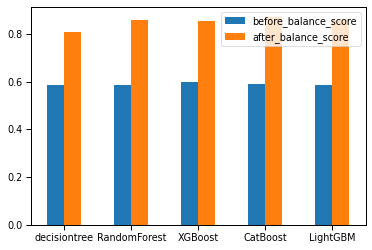

In [151]:
ax = score.plot.bar(rot=0)
#after the balancing, the f1 score significantly improved

In [143]:
# dt_u = DecisionTreeClassifier()  ##### categorical does not work
# dt_u.fit(x_train_u,y_train_u)
# predictdt_y = dt_s.predict(x_test_u)
# accuracy_dt = dt_s.score(x_test_u,y_test_u)
# print("Decision Tree accuracy is :",accuracy_dt)

In [144]:
## Good reference notebook play
# https://www.kaggle.com/code/arezoodahesh/customer-churn-with-oversampling-techniques

#Most implementations of random forest (and many other machine learning algorithms) that accept categorical inputs are either just automating the encoding of categorical features for you or using a method that becomes computationally intractable for large numbers of categories.
#A notable exception is H2O. H2O has a very efficient method for handling categorical data directly which often gives it an edge over tree based methods that require one-hot-encoding.

In [ ]:
# will just use the best model to predict the forecast
#  {'rsm': 0.9, 'min_data_in_leaf': 1, 'learning_rate': 0.05, 'l2_leaf_reg': 0, 'iterations': 200, 'depth': 9}



###Medel Performance Evaluation 

experiment with Scale_Pos_Weight

- default

- 3

- 5

In [157]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score, cohen_kappa_score,  average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [158]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print("Kappa- ", cohen_kappa_score(y_test, predictions))
    print("F1- ", f1_score(y_test, predictions))
    print("ROC_AUC_score- ", roc_auc_score(y_test, predictions))
    print("PR AUC- ", average_precision_score(y_test, predictions))


def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

def plot_curve(y_test, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
    fig.tight_layout()
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    ax1.set_title('Receiver Operating Characteristic')
    ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax1.legend(loc = 'lower right')
    ax1.plot([0, 1], [0, 1],'r--')
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1])
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')

    lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, predictions)
    ax2.set_title('Precision-Recall AUC Curve')
    ax2.plot(lr_recall, lr_precision, marker='.')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])

    plt.show()

In [159]:
#experiment scale_pos_weight 

cb1 = CatBoostClassifier(
    rsm = 0.9, 
    min_data_in_leaf = 1, 
    learning_rate =0.05, 
    l2_leaf_reg = 0, 
    iterations = 200, 
    depth =  9
)


cb2 = CatBoostClassifier(
    rsm = 0.9, 
    min_data_in_leaf = 1, 
    learning_rate =0.05, 
    l2_leaf_reg = 0, 
    iterations = 200, 
    depth =  9,
    scale_pos_weight= 3
)


cb3 = CatBoostClassifier(
    rsm = 0.9, 
    min_data_in_leaf = 1, 
    learning_rate =0.05, 
    l2_leaf_reg = 0, 
    iterations = 200, 
    depth =  9,
    scale_pos_weight= 5
)

In [160]:
cb1.fit(x_train_smote, y_train_smote)
pred_cb1 = cb1.predict(x_test)

0:	learn: 0.6504111	total: 47.9ms	remaining: 9.53s
1:	learn: 0.6171557	total: 86.6ms	remaining: 8.58s
2:	learn: 0.5877521	total: 129ms	remaining: 8.5s
3:	learn: 0.5693082	total: 169ms	remaining: 8.3s
4:	learn: 0.5514197	total: 212ms	remaining: 8.25s
5:	learn: 0.5322346	total: 251ms	remaining: 8.12s
6:	learn: 0.5122805	total: 299ms	remaining: 8.25s
7:	learn: 0.4963629	total: 336ms	remaining: 8.06s
8:	learn: 0.4805840	total: 375ms	remaining: 7.97s
9:	learn: 0.4671476	total: 424ms	remaining: 8.05s
10:	learn: 0.4564691	total: 464ms	remaining: 7.98s
11:	learn: 0.4465693	total: 509ms	remaining: 7.98s
12:	learn: 0.4339005	total: 548ms	remaining: 7.88s
13:	learn: 0.4249674	total: 586ms	remaining: 7.79s
14:	learn: 0.4152476	total: 627ms	remaining: 7.73s
15:	learn: 0.4071771	total: 676ms	remaining: 7.77s
16:	learn: 0.4007076	total: 715ms	remaining: 7.7s
17:	learn: 0.3931248	total: 750ms	remaining: 7.58s
18:	learn: 0.3886087	total: 794ms	remaining: 7.56s
19:	learn: 0.3808592	total: 832ms	remainin

In [161]:
print_validation_report(y_test, pred_cb1)

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1050
         1.0       0.54      0.58      0.56       357

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.77      0.77      1407

Accuracy Score: 0.7690120824449183
Kappa-  0.4038329911019849
F1-  0.5602165087956699
ROC_AUC_score-  0.7065826330532214
PR AUC-  0.4208119287411769


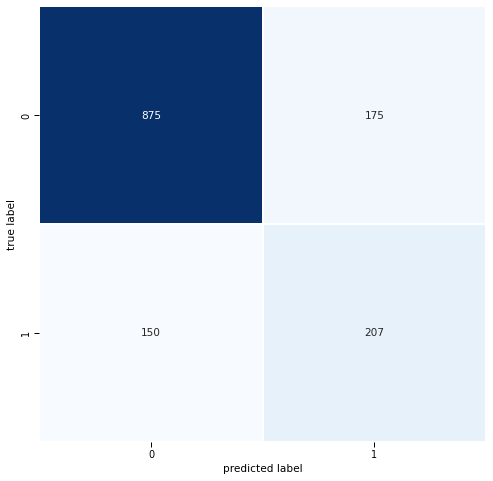

In [162]:
plot_confusion_matrix(y_test, pred_cb1)

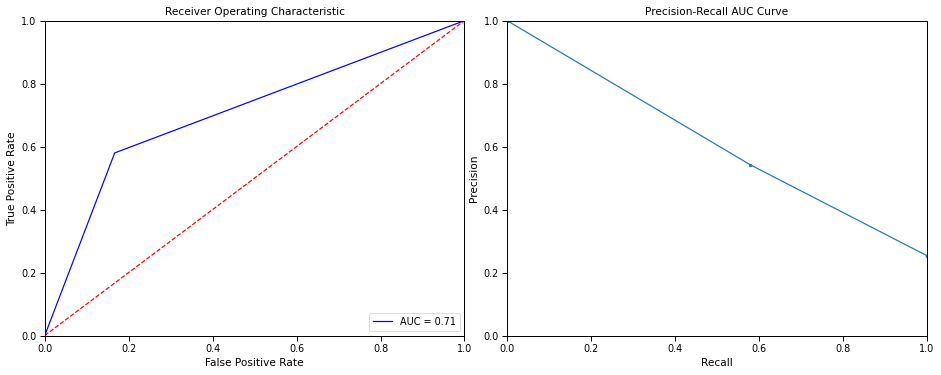

In [163]:
plot_curve(y_test, pred_cb1)

In [164]:
cb2.fit(x_train_smote, y_train_smote)
pred_cb2 = cb2.predict(x_test)

0:	learn: 0.6497808	total: 38.1ms	remaining: 7.58s
1:	learn: 0.6109873	total: 91.1ms	remaining: 9.02s
2:	learn: 0.5748632	total: 129ms	remaining: 8.47s
3:	learn: 0.5473250	total: 173ms	remaining: 8.48s
4:	learn: 0.5198400	total: 212ms	remaining: 8.28s
5:	learn: 0.4960162	total: 264ms	remaining: 8.55s
6:	learn: 0.4724136	total: 299ms	remaining: 8.24s
7:	learn: 0.4511152	total: 345ms	remaining: 8.28s
8:	learn: 0.4348550	total: 384ms	remaining: 8.15s
9:	learn: 0.4224731	total: 422ms	remaining: 8.01s
10:	learn: 0.4098020	total: 458ms	remaining: 7.86s
11:	learn: 0.3998422	total: 501ms	remaining: 7.85s
12:	learn: 0.3878873	total: 540ms	remaining: 7.77s
13:	learn: 0.3779287	total: 579ms	remaining: 7.7s
14:	learn: 0.3676764	total: 616ms	remaining: 7.59s
15:	learn: 0.3576149	total: 668ms	remaining: 7.68s
16:	learn: 0.3502933	total: 711ms	remaining: 7.65s
17:	learn: 0.3427780	total: 754ms	remaining: 7.63s
18:	learn: 0.3365988	total: 809ms	remaining: 7.71s
19:	learn: 0.3288018	total: 853ms	remain

In [165]:
print_validation_report(y_test, pred_cb2)

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.81      1050
         1.0       0.49      0.69      0.57       357

    accuracy                           0.74      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.78      0.74      0.75      1407

Accuracy Score: 0.7405828002842928
Kappa-  0.3949627650362454
F1-  0.5740956826137689
ROC_AUC_score-  0.7235854341736695
PR AUC-  0.4179164680797692


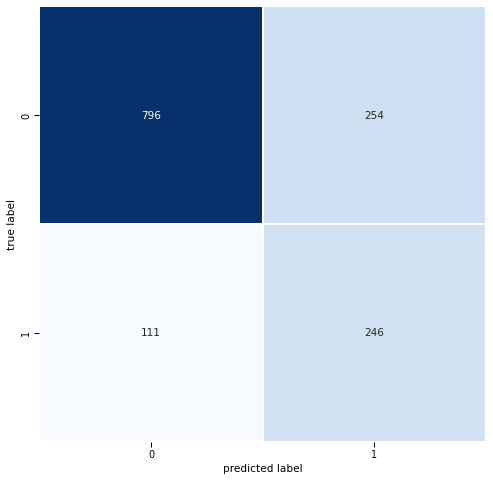

In [166]:
plot_confusion_matrix(y_test, pred_cb2)

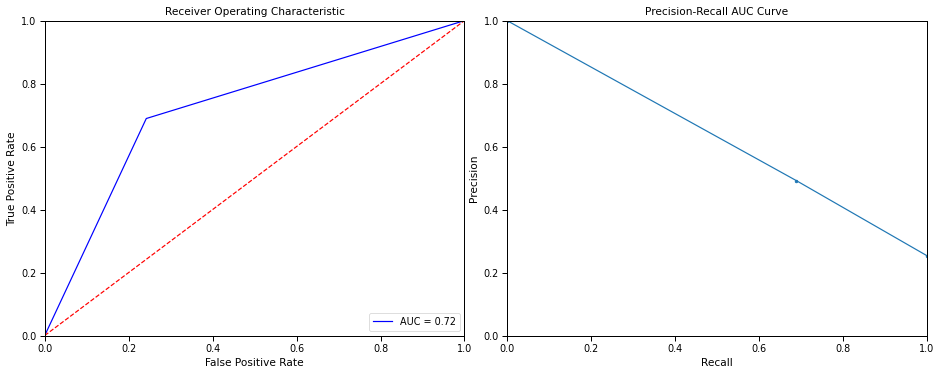

In [167]:
plot_curve(y_test, pred_cb2)

In [168]:
cb3.fit(x_train_smote, y_train_smote)
pred_cb3 = cb3.predict(x_test)

0:	learn: 0.6416601	total: 35.8ms	remaining: 7.13s
1:	learn: 0.5935739	total: 76.3ms	remaining: 7.55s
2:	learn: 0.5501889	total: 117ms	remaining: 7.7s
3:	learn: 0.5162734	total: 156ms	remaining: 7.64s
4:	learn: 0.4841372	total: 197ms	remaining: 7.69s
5:	learn: 0.4570963	total: 236ms	remaining: 7.63s
6:	learn: 0.4336450	total: 274ms	remaining: 7.54s
7:	learn: 0.4129423	total: 311ms	remaining: 7.46s
8:	learn: 0.3946606	total: 351ms	remaining: 7.45s
9:	learn: 0.3791129	total: 389ms	remaining: 7.4s
10:	learn: 0.3635731	total: 427ms	remaining: 7.33s
11:	learn: 0.3505615	total: 472ms	remaining: 7.39s
12:	learn: 0.3368514	total: 522ms	remaining: 7.51s
13:	learn: 0.3272240	total: 572ms	remaining: 7.6s
14:	learn: 0.3166714	total: 612ms	remaining: 7.55s
15:	learn: 0.3075089	total: 661ms	remaining: 7.6s
16:	learn: 0.2998569	total: 709ms	remaining: 7.63s
17:	learn: 0.2911835	total: 763ms	remaining: 7.71s
18:	learn: 0.2855421	total: 804ms	remaining: 7.66s
19:	learn: 0.2776712	total: 849ms	remaining

In [169]:
print_validation_report(y_test, pred_cb3)

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80      1050
         1.0       0.48      0.73      0.58       357

    accuracy                           0.73      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.78      0.73      0.75      1407

Accuracy Score: 0.7313432835820896
Kappa-  0.392749244712991
F1-  0.578125
ROC_AUC_score-  0.7294117647058824
PR AUC-  0.41826391343511626


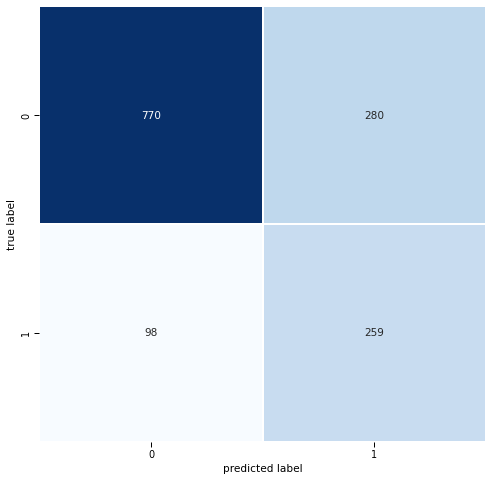

In [170]:
plot_confusion_matrix(y_test, pred_cb3)

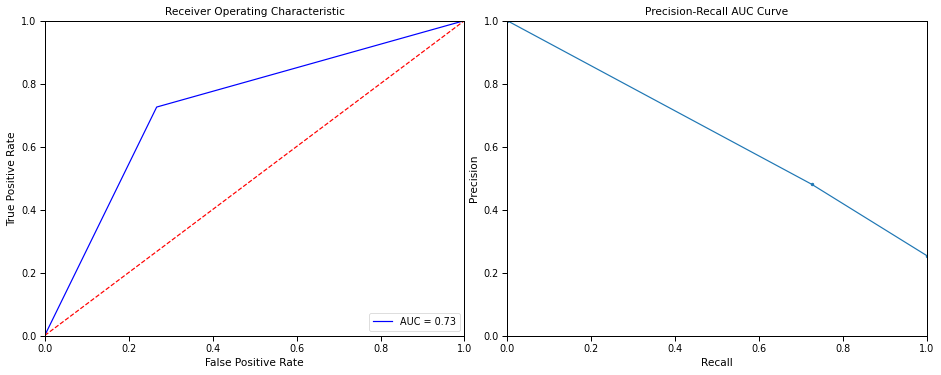

In [171]:
plot_curve(y_test, pred_cb3)

In [173]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.4 MB/s 


In [174]:
import shap
#SHAP is a Python library that uses Shapley values to explain the output of any machine learning model

explainercat = shap.TreeExplainer(cb3)
shap_values_cat_test = explainercat.shap_values(x_test)
shap_values_cat_train = explainercat.shap_values(x_train)

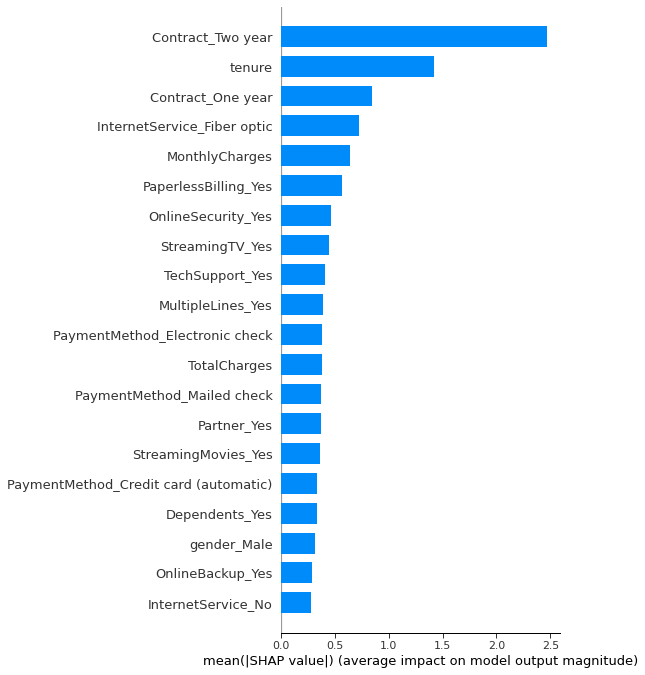

In [175]:
shap.summary_plot(shap_values_cat_train, x_train, plot_type="bar")

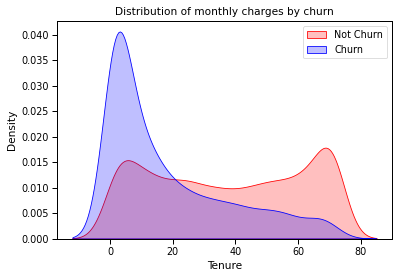

In [179]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of monthly charges by churn');


#shorter period custoemr is more easier to churn

In [199]:
df_con = df.groupby(['Contract', 'Churn']).size().unstack('Churn')

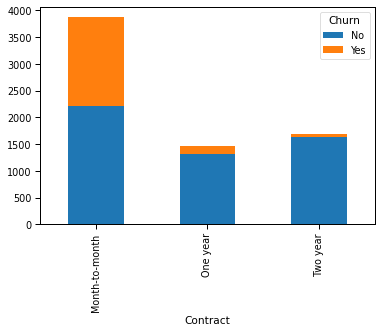

In [203]:
df_con.plot.bar(stacked=True)

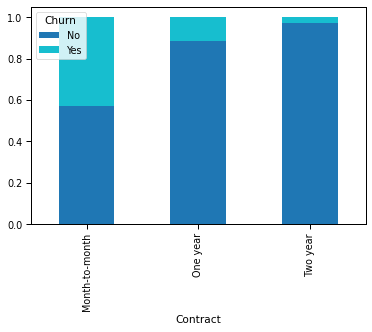

In [205]:
cross_tab = pd.crosstab(index=df['Contract'],
                        columns=df['Churn'],
                        normalize='index')
cross_tab.plot(kind='bar', stacked=True, colormap='tab10')

#monthly contract customers are easier to leave